In [3]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading data
file_path = Path("final_profile.csv")
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Height,Single,Available,Married,Seeing someone,Unknown,Straight,Gay,...,No(drinks),Yes(drugs),Rarely(drugs),No(drugs),Yes(smokes),Rarely(smokes),No(smokes),Agnostic,Atheist,Religious
0,-1.093877,1.0,1.678397,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.281389,1.0,0.426715,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.598758,1.0,-0.073958,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.988087,1.0,0.677051,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.353349,1.0,-0.574631,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [5]:
df.isna().sum()

Age               0
Gender            0
Height            0
Single            0
Available         0
                 ..
Rarely(smokes)    0
No(smokes)        0
Agnostic          0
Atheist           0
Religious         0
Length: 71, dtype: int64

In [6]:
#df['height_scaled'].astype('float64')

In [7]:
#df.dtypes

In [8]:
#for key, value in df.iteritems():
    #print(key, value.max())

In [9]:
#for key, value in df.iteritems():
    #print(key, value.isna())

In [10]:
#ds = df.isin([np.inf, -np.inf])
#print(ds)

# Using k-means

In [13]:
inertia = []
k = list(range(1, 20))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,452839.571551
1,2,406445.142290
2,3,373236.714384
3,4,349540.072698
4,5,338282.243018
5,6,330167.078533
6,7,323328.500148
7,8,317525.889957
8,9,312882.728248
9,10,308997.572815


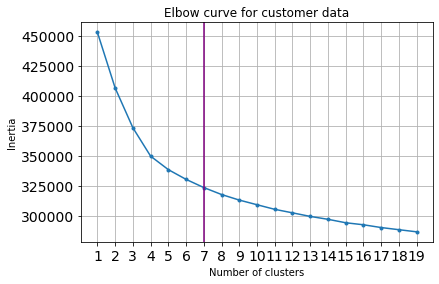

In [14]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'], marker ='.')
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.grid()
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x = 7, color = 'purple')
plt.savefig('elbow_plot.png')
plt.show()


In [15]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [17]:
clusters = get_clusters(7, df)

In [18]:
clusters

,Age,Gender,Height,Single,Available,Married,Seeing someone,Unknown,Straight,Gay,...,Yes(drugs),Rarely(drugs),No(drugs),Yes(smokes),Rarely(smokes),No(smokes),Agnostic,Atheist,Religious,class
0,-1.093877,1.0,1.678397,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
1,0.281389,1.0,0.426715,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
2,0.598758,1.0,-0.073958,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5
3,-0.988087,1.0,0.677051,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
4,-0.353349,1.0,-0.574631,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59936,-0.141770,0.0,-1.575978,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6
59937,2.820340,0.0,-1.575978,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
59938,-0.882298,1.0,0.927388,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
59939,1.021916,1.0,0.677051,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5


In [19]:
class_df=clusters['class']
class_df

0        3
1        3
2        5
3        3
4        6
        ..
59936    6
59937    2
59938    0
59939    5
59940    0
Name: class, Length: 59941, dtype: int32

In [20]:
class_df1=pd.DataFrame(class_df)
class_df1

,class
0,3
1,3
2,5
3,3
4,6
...,...
59936,6
59937,2
59938,0
59939,5


In [21]:
clustered_df=pd.DataFrame(clusters)
clustered_df.head()

,Age,Gender,Height,Single,Available,Married,Seeing someone,Unknown,Straight,Gay,...,Yes(drugs),Rarely(drugs),No(drugs),Yes(smokes),Rarely(smokes),No(smokes),Agnostic,Atheist,Religious,class
0,-1.093877,1.0,1.678397,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3
1,0.281389,1.0,0.426715,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
2,0.598758,1.0,-0.073958,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5
3,-0.988087,1.0,0.677051,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
4,-0.353349,1.0,-0.574631,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6


In [34]:
def show_clusters(df):
    plt.scatter(df['Age'], df['Income'], c=df['class'])
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.show()

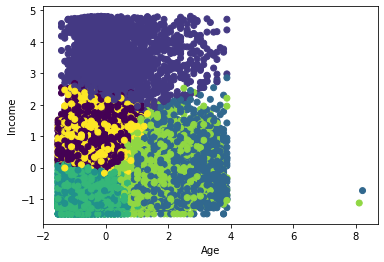

In [35]:
show_clusters(clusters)

We can also check the relative size and distribution of the clusters using an inter-cluster distance map.

In [38]:
# Inter cluster distance map
#from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
#visualizer = InterclusterDistance(inertia)
#visualizer.fit(clustered_df)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

In [39]:
#pip install yellowbrick

# Using PCA

In [40]:
from sklearn.decomposition import PCA

# PCA to view potential clusters later
pca = PCA(n_components=0.95)
pca.fit(df)
pc_df = pca.transform(df)

In [41]:
# Transform PCA data to a DataFrame
pca_df = pd.DataFrame(data=pc_df)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.405289,-2.081645,-0.528914,-0.549132,-0.023039,1.001949,-0.587555,0.618724,-0.140553,-0.355482,...,-0.023460,0.029479,0.087447,0.035180,-0.324239,-0.002207,-0.205281,0.051327,-0.006606,0.085729
1,-0.143053,-0.532533,-0.717285,0.353128,0.617998,-0.755578,-0.475554,0.302743,0.565557,-0.027548,...,0.288388,-0.141507,-0.141313,0.244846,0.041462,-0.003883,0.059951,-0.078788,-0.060419,0.121009
2,1.878337,-0.034845,-0.726413,0.055473,0.054803,0.419461,0.120768,0.676042,-0.426248,0.367554,...,-0.139107,0.443097,-0.137273,-0.038304,0.122965,0.084638,-0.139105,-0.162525,-0.123346,0.166666
3,-0.150301,-1.752945,-0.108782,0.134648,0.173030,-0.052645,0.876903,-0.394401,-0.060630,0.010083,...,-0.099971,0.938628,0.217437,-0.286039,0.027681,0.021562,0.029256,-0.016711,-0.091702,-0.013088
4,2.809918,-0.089139,0.230477,-0.692991,-0.664256,0.237168,-0.773186,-0.737919,-0.356566,-0.158092,...,-0.559589,-0.237729,-0.079507,-0.305767,-0.024452,-0.091459,-0.032930,0.157489,0.061043,-0.203501


In [42]:
# Fetch the explained variance
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
cumulative_sum

array([0.36309918, 0.46267919, 0.54849065, 0.61380302, 0.64516402,
       0.67237167, 0.6975899 , 0.72034872, 0.74093134, 0.75992868,
       0.77777276, 0.79421829, 0.81024226, 0.8236979 , 0.83505114,
       0.84532222, 0.85508214, 0.86427446, 0.87285768, 0.88098742,
       0.887974  , 0.8946521 , 0.90103397, 0.90726734, 0.91325684,
       0.91887107, 0.92427024, 0.92957989, 0.93473074, 0.93978109,
       0.94462594, 0.94927103, 0.95339122])

In [43]:
expl_var = pca.explained_variance_ratio_
expl_var

array([0.36309918, 0.09958002, 0.08581146, 0.06531237, 0.031361  ,
       0.02720765, 0.02521824, 0.02275881, 0.02058262, 0.01899735,
       0.01784407, 0.01644554, 0.01602397, 0.01345563, 0.01135324,
       0.01027108, 0.00975992, 0.00919232, 0.00858322, 0.00812974,
       0.00698658, 0.00667809, 0.00638187, 0.00623337, 0.0059895 ,
       0.00561423, 0.00539918, 0.00530965, 0.00515085, 0.00505035,
       0.00484485, 0.00464509, 0.00412019])

In [44]:
pca_df.shape

(59941, 33)

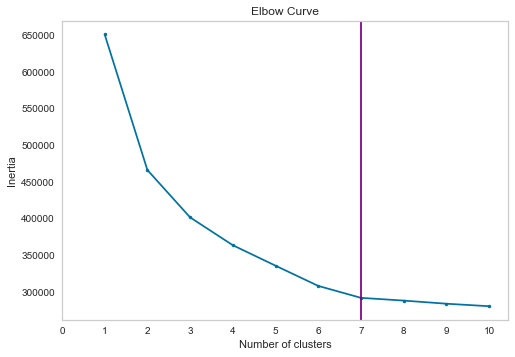

In [46]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data1 = {"k": k, "inertia": inertia}
df_elbow1 = pd.DataFrame(elbow_data1)

plt.plot(df_elbow1['k'], df_elbow1['inertia'], marker ='.')
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.axvline(x = 7, color = 'purple')
plt.show()

In [47]:
# Predicting clusters with k=7

# Initialize the k-means model
model = KMeans(n_clusters=7, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add the predicted class column to the dataframe
pca_df["class"] = model.labels_
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,class
0,-0.405289,-2.081645,-0.528914,-0.549132,-0.023039,1.001949,-0.587555,0.618724,-0.140553,-0.355482,...,0.029479,0.087447,0.035180,-0.324239,-0.002207,-0.205281,0.051327,-0.006606,0.085729,4
1,-0.143053,-0.532533,-0.717285,0.353128,0.617998,-0.755578,-0.475554,0.302743,0.565557,-0.027548,...,-0.141507,-0.141313,0.244846,0.041462,-0.003883,0.059951,-0.078788,-0.060419,0.121009,4
2,1.878337,-0.034845,-0.726413,0.055473,0.054803,0.419461,0.120768,0.676042,-0.426248,0.367554,...,0.443097,-0.137273,-0.038304,0.122965,0.084638,-0.139105,-0.162525,-0.123346,0.166666,5
3,-0.150301,-1.752945,-0.108782,0.134648,0.173030,-0.052645,0.876903,-0.394401,-0.060630,0.010083,...,0.938628,0.217437,-0.286039,0.027681,0.021562,0.029256,-0.016711,-0.091702,-0.013088,4
4,2.809918,-0.089139,0.230477,-0.692991,-0.664256,0.237168,-0.773186,-0.737919,-0.356566,-0.158092,...,-0.237729,-0.079507,-0.305767,-0.024452,-0.091459,-0.032930,0.157489,0.061043,-0.203501,1


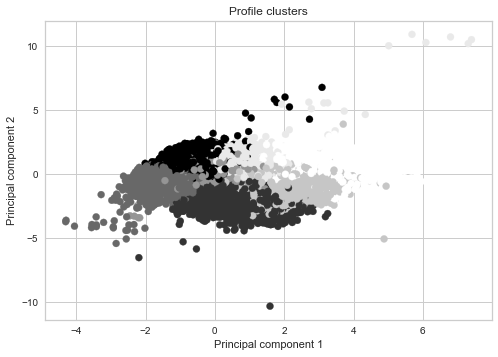

In [51]:
# Visualize the clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Profile clusters')
plt.show()

In [52]:
# Saving cleaned data
file_path = Path("clustered.csv")
clustered_df.to_csv(file_path, index=False)

In [53]:
# Saving cleaned data
file_path = Path("PCA_reduced.csv")
pca_df.to_csv(file_path, index=False)

In [54]:
# Saving cleaned data
file_path = Path("class.csv")
class_df1.to_csv(file_path, index=False)